In [2]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
df = pd.read_csv("kenya_data/diaries_transactions_all.csv", dtype={'account_startclose_balance': str})

I set the type of 'account_startclose_balance to str because it would otherwise give me an error. I checked for the types that this column contains and it seems like it is NaN and 'start' and 'close', so string seemed appropriate. This is how I checked for it.

In [8]:
d = set()
for element in df['account_startclose_balance']:
    d.add(type(element))
          
print(d)

{<class 'str'>, <class 'float'>}


In [9]:
f = set()
for element in df['account_startclose_balance']:
    if type(element)==float:
        f.add(str(element))

print(f)

{'nan'}


In [10]:
f = set()
for element in df['account_startclose_balance']:
    if type(element)==str:
        f.add(element)

print(f)

{'Close', 'Start'}


In [11]:
df.head()

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,...,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
0,KELDL02,NaN,03sep2012,02oct2013,394,13,04=Diaries Interview,02oct2013,10,2013,...,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.586210
1,KVIHC16,NaN,24sep2012,19sep2013,360,12,04=Diaries Interview,22apr2013,4,2013,...,NaN,NaN,Outflow,100.0,1.176471,0,NaN,NaN,NaN,7.206897
2,KELDK21,NaN,20sep2012,22oct2013,397,13,04=Diaries Interview,02oct2013,10,2013,...,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.000000
3,KMOMT22,NaN,21sep2012,01nov2013,406,14,04=Diaries Interview,21feb2013,2,2013,...,NaN,NaN,Inflow,710.0,8.352942,0,NaN,NaN,NaN,4.793103
4,KMOMT32,NaN,20sep2012,18oct2013,393,13,04=Diaries Interview,02may2013,5,2013,...,NaN,NaN,Outflow,100.0,1.176471,0,NaN,NaN,NaN,6.517241


In [12]:
df.shape

(483949, 58)

In [13]:
df.describe()

,unique_hhs,tot_hh_daysofobs,tot_hh_monthsofobs,int_month,int_year,unique_accnts,unique_hm_owner,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,...,trx_fee,trx_mode_code,trx_place_incommunity,trx_distance_km,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
count,298.0,483949.000000,483949.000000,483949.000000,483949.000000,9546.0,670.0,483949.000000,483949.000000,4.839490e+05,...,77070.000000,476292.000000,457703.000000,457498.000000,4.834300e+05,483430.000000,483949.000000,12798.000000,12798.000000,483949.000000
mean,1.0,394.805825,13.125895,6.426041,2012.847717,1.0,1.0,421.460920,14.157174,7.068031e+16,...,0.067679,2.199067,0.869527,6.824379,6.547228e+02,7.702621,0.003350,3.616619,307.412564,7.336331
std,0.0,32.657529,1.141561,3.204513,0.359490,0.0,0.0,118.927981,4.169955,1.964200e+16,...,0.251195,3.461173,0.336824,79.340121,5.453241e+03,64.155778,0.057778,28.127688,2390.853350,3.766231
min,1.0,214.000000,7.000000,1.000000,2012.000000,1.0,1.0,0.000000,0.000000,3.413549e+16,...,0.000000,1.000000,0.000000,0.000000,-2.595000e+04,-305.294100,0.000000,0.000000,0.000000,0.000000
25%,1.0,375.000000,12.000000,4.000000,2013.000000,1.0,1.0,358.000000,12.000000,5.713807e+16,...,0.000000,1.000000,1.000000,0.000000,2.000000e+01,0.235294,0.000000,0.000000,0.000000,4.275862
50%,1.0,391.000000,13.000000,7.000000,2013.000000,1.0,1.0,502.000000,17.000000,6.213598e+16,...,0.000000,1.000000,1.000000,0.000000,5.000000e+01,0.588235,0.000000,0.470588,40.000000,7.620690
75%,1.0,413.000000,14.000000,9.000000,2013.000000,1.0,1.0,502.000000,17.000000,8.913662e+16,...,0.000000,1.000000,1.000000,0.000000,2.300000e+02,2.705882,0.000000,1.529412,130.000000,10.482760
max,1.0,501.000000,17.000000,12.000000,2015.000000,1.0,1.0,502.000000,17.000000,1.121385e+17,...,1.000000,19.000000,1.000000,14317.670000,1.200000e+06,14117.650000,1.000000,1529.412000,130000.000000,17.275860


In [14]:
# this just took way too long
#for col in df.columns:
#    df[col].hist()
# I think that this is because some columns have too many values??

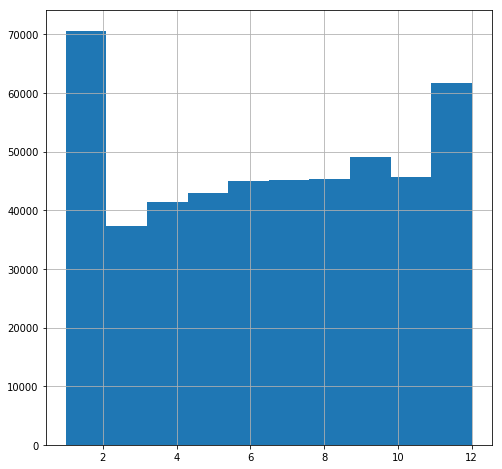

In [4]:
df['trx_month'].hist(figsize=(8,8))

### the big majority of transactions seems to be very small

AxesSubplot(0.125,0.125;0.775x0.755)


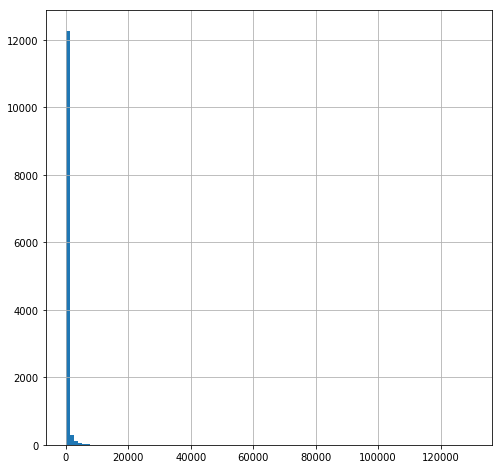

In [5]:
print(df['trx_inkind_value_kes'].hist(figsize=(8,8),bins=100))


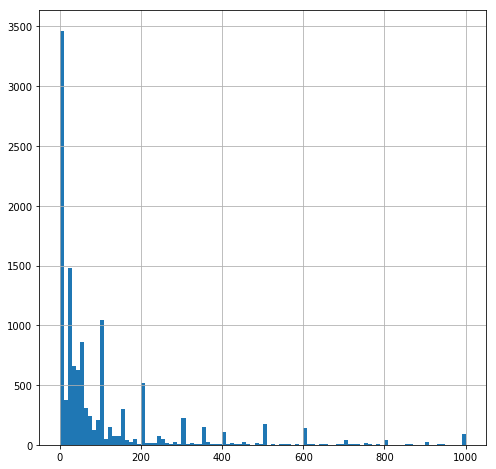

In [6]:
df[df['trx_inkind_value_kes']<=1000]['trx_inkind_value_kes'].hist(figsize=(8,8),bins=100)

## value of transactions wrt time
I am not sure though if it orders the dates correctly since they are formatted in a weird way. (like 02oct2013)

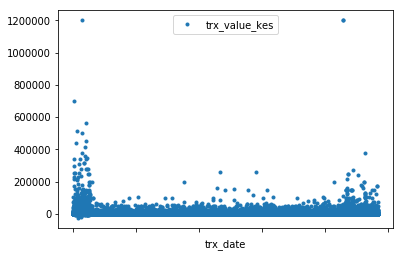

In [7]:
df.plot(x = "trx_date",y="trx_value_kes",style='.')

### How many unique households.

In [19]:
ids = {}
for id in df['hh_ids']:
    if id in ids:
        ids[id] += 1
    else:
        ids[id] = 1
    

In [20]:
len(ids)

298

### How many transactions per household on average

In [21]:
sum=0
for id, count in ids.items():
    sum = sum + count
sum/len(ids)

1623.989932885906

# Let's look at a random household.

In [21]:
import random 
random.choice(list(ids.keys()))

'KMAKE29'

In [22]:
ids["KELDK36"]

1020

In [8]:
df_sin = df[df['hh_ids']=="KELDK36"]

In [9]:
df_sin.describe()

,unique_hhs,tot_hh_daysofobs,tot_hh_monthsofobs,int_month,int_year,unique_accnts,unique_hm_owner,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,...,trx_fee,trx_mode_code,trx_place_incommunity,trx_distance_km,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
count,1.0,1020.0,1020.0,1020.000000,1020.000000,22.0,2.0,1020.000000,1020.000000,1.020000e+03,...,167.000000,1004.000000,967.000000,967.000000,1019.000000,1019.000000,1020.000000,155.0,155.0,1020.000000
mean,1.0,417.0,14.0,6.919608,2012.843137,1.0,1.0,401.158824,13.465686,9.605851e+16,...,0.167665,2.027888,0.650465,6.942170,2267.903827,26.681223,0.005882,0.0,0.0,7.661663
std,NaN,0.0,0.0,2.676802,0.363850,0.0,0.0,117.422725,4.086383,1.898434e+16,...,0.374692,3.728206,0.477070,32.417744,6930.166336,81.531382,0.076508,0.0,0.0,3.720021
min,1.0,417.0,14.0,1.000000,2012.000000,1.0,1.0,0.000000,0.000000,5.113548e+16,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,1.0,417.0,14.0,4.000000,2013.000000,1.0,1.0,273.000000,9.000000,1.051366e+17,...,0.000000,1.000000,0.000000,0.000000,100.000000,1.176471,0.000000,0.0,0.0,4.931035
50%,1.0,417.0,14.0,7.000000,2013.000000,1.0,1.0,502.000000,17.000000,1.051370e+17,...,0.000000,1.000000,1.000000,0.000000,200.000000,2.352941,0.000000,0.0,0.0,8.534482
75%,1.0,417.0,14.0,9.000000,2013.000000,1.0,1.0,502.000000,17.000000,1.051375e+17,...,0.000000,1.000000,1.000000,8.651168,2700.000000,31.764710,0.000000,0.0,0.0,10.517240
max,1.0,417.0,14.0,12.000000,2013.000000,1.0,1.0,502.000000,17.000000,1.051404e+17,...,1.000000,19.000000,1.000000,245.429700,100000.000000,1176.471000,1.000000,0.0,0.0,14.379310


In [25]:
df_sin.iloc[3]

hh_ids                                                                  KELDK36
unique_hhs                                                                  NaN
first_trx_date_hh                                                     14sep2012
last_trx_date_hh                                                      05nov2013
tot_hh_daysofobs                                                            417
tot_hh_monthsofobs                                                           14
interview_designation                                      04=Diaries Interview
int_date                                                              12aug2013
int_month                                                                     8
int_year                                                                   2013
int_yr_mo                                                               2013_08
first_int_date                                                        22sep2012
account_ids                             

### evolution of value of transactions in time wrt the days since the household was first interviewed

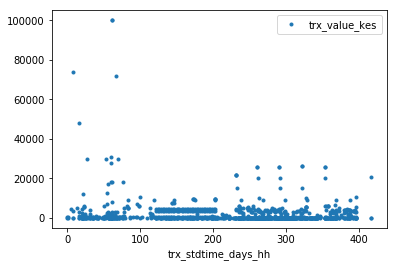

In [10]:
df_sin.plot(x = "trx_stdtime_days_hh",y="trx_value_kes",style='.')

### The next graph is wrt the date. I guess that they do not know how to order the dates properly which makes sense since they are saved as strings.

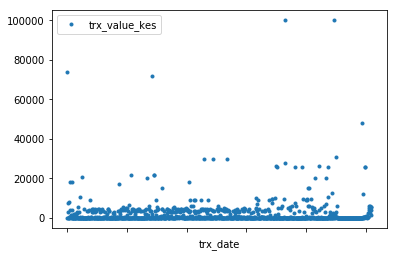

In [11]:
df_sin.plot(x = "trx_date",y="trx_value_kes",style='.')

In [12]:
df_sin.head()

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,...,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
114,KELDK36,NaN,14sep2012,05nov2013,417,14,06=Cleaning interview,16oct2013,10,2013,...,NaN,NaN,NaN,73821.0,868.482400,0,NaN,NaN,NaN,0.275862
320,KELDK36,NaN,14sep2012,05nov2013,417,14,06=Cleaning interview,16oct2013,10,2013,...,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.310340
614,KELDK36,NaN,14sep2012,05nov2013,417,14,04=Diaries Interview,15oct2013,10,2013,...,NaN,NaN,NaN,3000.0,35.294120,0,NaN,NaN,NaN,13.655170
710,KELDK36,NaN,14sep2012,05nov2013,417,14,04=Diaries Interview,12aug2013,8,2013,...,NaN,NaN,NaN,30.0,0.352941,0,NaN,NaN,NaN,11.275860
754,KELDK36,NaN,14sep2012,05nov2013,417,14,04=Diaries Interview,15apr2013,4,2013,...,NaN,"01=Bank, MFI, SACCO, insurance branch",Outflow,7800.0,91.764710,0,NaN,NaN,NaN,4.965517


## Now we want to add some columns to the dataframe, so we rename it.

In [13]:
df_sin_rec = df_sin
df_sin_rec.shape

(1020, 58)

### My goal is to multiply the transaction with the column "trx_bsheet_direction" that indicated whether it increased or decreased the balance. Directly setting all elements of that column to -1 or 1 did not work, I guess because the type of the variable does not match.

In [14]:
df_sin_rec.insert(58, "trx_num_dir", np.zeros(df_sin_rec.shape[0]))
df_sin_rec["trx_bsheet_direction"].head()

114    Increase
320         NaN
614         NaN
710    Decrease
754    Increase
Name: trx_bsheet_direction, dtype: object

In [15]:
for index, row in df_sin_rec.iterrows():
    if row["trx_bsheet_direction"]=='Increase':
        df_sin_rec.at[index,"trx_num_dir"]=1
    elif row["trx_bsheet_direction"]=='Decrease':
        df_sin_rec.at[index,"trx_num_dir"]=-1

df_sin_rec.loc[:]["trx_num_dir"].sample(10)

408166    0.0
208647    0.0
365234    0.0
435564    0.0
84610     1.0
433133    0.0
24598    -1.0
452365    0.0
328902    0.0
435404    0.0
Name: trx_num_dir, dtype: float64

### It seems like a big part of the transactions are neither labelled as 'Increase' nor 'Decrease'.

In [16]:
count = 0
for index, row in df_sin_rec.iterrows():
    if row["trx_num_dir"]==0:
        count +=1
print(count)

871


### Let's see what kind of entries are neither.

In [17]:
count = 0
for index, row in df_sin_rec.iterrows():
    if count >20:
        break
    elif row["trx_num_dir"]==0:
        print(row[['trx_type_desc','trx_value_kes', 'trx_bsheet_direction']])
        count +=1

trx_type_desc           Saving in a ROSCA
trx_value_kes                           0
trx_bsheet_direction                  NaN
Name: 320, dtype: object
trx_type_desc           Keeping Money (Cash) at Home
trx_value_kes                                   3000
trx_bsheet_direction                             NaN
Name: 614, dtype: object
trx_type_desc           Friends and family: Borrowing
trx_value_kes                                       0
trx_bsheet_direction                              NaN
Name: 1521, dtype: object
trx_type_desc           Friends and family: Borrowing
trx_value_kes                                       0
trx_bsheet_direction                              NaN
Name: 1746, dtype: object
trx_type_desc           Cash on hand now
trx_value_kes                        500
trx_bsheet_direction                 NaN
Name: 3203, dtype: object
trx_type_desc           Cash on hand now
trx_value_kes                        700
trx_bsheet_direction                 NaN
Name: 3684, dtype

### I understand that "Cash on Hand" does not have an increase or decrease but apparently some of the other transactions still have a value, like the ones called "Donations to church" or "Agricultural Income". I wonder why that is.

### I still want to try to plot the evolution of the balance of this household.

### First we insert a column that will contain the value*direction

In [18]:
df_sin_rec.insert(59, "trx_val_dir", np.zeros(df_sin_rec.shape[0]))

In [19]:
for index, row in df_sin_rec.iterrows():
    # to make sure we don't get nan's later
    if not math.isnan(row["trx_value_kes"]):
        df_sin_rec.at[index,"trx_val_dir"]=row["trx_value_kes"]*row["trx_num_dir"]
    

df_sin_rec.loc[:]["trx_val_dir"].sample(10)

452365     0.0
218853     0.0
297172     0.0
433314     0.0
135002     0.0
434392     0.0
387852     0.0
167065     0.0
355987     0.0
23273    -30.0
Name: trx_val_dir, dtype: float64

### We only keep those cells that have a non-zero transaction, so we again rename the dataframe.

In [20]:
df_sin_rec2 = df_sin_rec[df_sin_rec["trx_val_dir"]!=0]

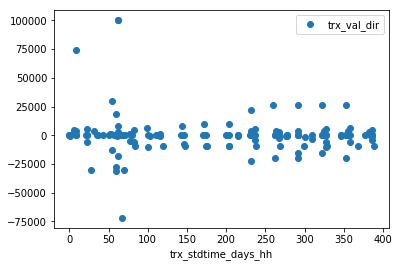

In [37]:
df_sin_rec2.plot(x = "trx_stdtime_days_hh", y = "trx_val_dir",style=('o'))

In [42]:
df_sin_rec2['trx_stdtime_days_hh']

114         8
710       327
754       144
3115       62
3422       60
7861        0
10370      31
11295     386
11370       8
11605      78
12426     353
14345      67
15215     386
21159     347
21299     322
22472     174
23273     203
24236     327
24573     146
24598     358
25538     377
25937      67
43868     299
48287      36
56497     325
60519       8
80568     278
84610      50
102583    382
106796    276
         ... 
434965    292
434992    322
435012    386
435056    383
435232     99
435242     80
435262    353
435272    143
435370    100
435406    291
435415    353
435506     62
435549     55
435571     62
435595     60
444918     62
445684    215
445709    347
447709    386
449066    353
449253    115
449340    278
449757    215
450279     61
451313     61
452312    358
452378    267
452385    237
452432    327
452471    386
Name: trx_stdtime_days_hh, Length: 148, dtype: int64

### So we see that the entries are not ordered according to their time.

### It would probably be better to only calculate the final balance for each day. (But we should then probably also count the cash on hand as a positive balance.) I wonder whether there already is a dataset that contains these values. I'll still try to see if I can extract anything from what we have here.

#### First we make a list of all the different days that appear.

In [21]:

bal_evol = pd.DataFrame()

# order the data set according to day of transaction

df_sin_rec2.sort_values("trx_stdtime_days_hh", inplace = True)

days = [df_sin_rec2.iloc[0, df.columns.get_loc("trx_stdtime_days_hh")]]

for day in df_sin_rec2["trx_stdtime_days_hh"]:
    if not day == days[len(days)-1]:
        days.append(day)
print(days)
type(days)
print(len(days),len(np.zeros(len(days))))

[0, 1, 6, 8, 21, 22, 23, 28, 31, 35, 36, 43, 50, 52, 53, 54, 55, 57, 60, 61, 62, 64, 67, 70, 71, 77, 78, 80, 82, 83, 84, 99, 100, 103, 110, 115, 119, 143, 144, 146, 147, 171, 172, 174, 175, 200, 203, 215, 230, 232, 237, 238, 260, 262, 263, 267, 269, 276, 278, 291, 292, 299, 300, 309, 322, 325, 327, 329, 347, 353, 355, 358, 368, 377, 382, 383, 386, 388]
78 78


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
bal_evol.insert(0,"day", days)
bal_evol.insert(1,"balance",np.zeros(len(days)))

bal_evol.head()

,day,balance
0,0,0.0
1,1,0.0
2,6,0.0
3,8,0.0
4,21,0.0


### Here we make a column containing the evolution of the balance.

In [25]:
df_sin_rec2.insert(60,"balance_evol", np.zeros(df_sin_rec2.shape[0]))

s = 0
for index, row in df_sin_rec2.iterrows():
    s+=df_sin_rec2.loc[index,"trx_val_dir"]
    df_sin_rec2.at[index,"balance_evol"] = s

# and we check if it looks right
print(df_sin_rec2.iloc[2,df_sin_rec2.columns.get_loc("balance_evol")])
df_sin_rec2[["trx_date","trx_month","trx_stdtime_days_hh","trx_val_dir","balance_evol"]].head(10)

650.0


,trx_date,trx_month,trx_stdtime_days_hh,trx_val_dir,balance_evol
360244,14sep2012,9,0,525.0,525.0
7861,14sep2012,9,0,-25.0,500.0
338820,15sep2012,9,1,150.0,650.0
293516,15sep2012,9,1,-500.0,150.0
194891,20sep2012,9,6,4350.0,4500.0
323137,22sep2012,9,8,3500.0,8000.0
60519,22sep2012,9,8,150.0,8150.0
11370,22sep2012,9,8,200.0,8350.0
114,22sep2012,9,8,73821.0,82171.0
407050,05oct2012,10,21,100.0,82271.0


In [163]:
# final balance
print(df_sin_rec2.iloc[df_sin_rec2.shape[0]-1,df_sin_rec2.columns.get_loc("balance_evol")])

47341.0


In [26]:
# now we assign the final balance of each day to the corresponding day in the dataset bal_evol
count = 0
for index, row in bal_evol.iterrows():
    while df_sin_rec2.iloc[count,df_sin_rec2.columns.get_loc("trx_stdtime_days_hh")]<=row["day"] and df_sin_rec2.iloc[count+1,df_sin_rec2.columns.get_loc("trx_stdtime_days_hh")]<=row["day"] and count < df_sin_rec2.shape[0]-2:
        count+=1
    bal_evol.at[index,"balance"]=df_sin_rec2.iloc[count,df_sin_rec2.columns.get_loc("balance_evol")]
    # as the loop will not work for the last element, we need to fix this ourselves
    if index == bal_evol.shape[0]-1:
        bal_evol.at[index,"balance"]=df_sin_rec2.iloc[df_sin_rec2.shape[0]-1,df_sin_rec2.columns.get_loc("balance_evol")]

### Let's check if it worked.

In [27]:
bal_evol.tail()

,day,balance
73,377,52991.0
74,382,55991.0
75,383,56191.0
76,386,56341.0
77,388,47341.0


In [28]:
df_sin_rec2[["trx_stdtime_days_hh","balance_evol"]].tail(10)

,trx_stdtime_days_hh,balance_evol
25538,377,52991.0
102583,382,55991.0
435056,383,56191.0
166488,386,55618.0
435012,386,51618.0
11295,386,51591.0
15215,386,51541.0
447709,386,52141.0
452471,386,56341.0
418201,388,47341.0


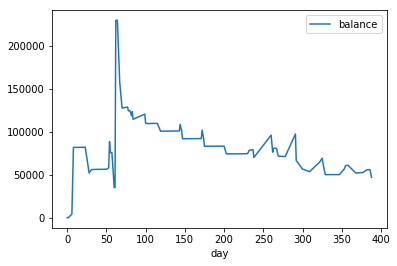

In [29]:
bal_evol.plot(x="day",y="balance")